# 3D flows in the North Sea

This demo shows data from the DSCM-FM 3D model that covers the North-west continental shelf of Europe and models currents, sealevel, salinity and temperature. It is a good source of boundary conditions for more detailed models. Some putput files from the model have been reinterpolated to a regular grid and stored in an efficient web-friendly format (Zarr).

In [1]:
# imports

#data
import xarray as xr
import numpy as np 
import zarr
#plotting
import matplotlib.pyplot as plt 
%matplotlib widget
plt.rcParams['figure.figsize'] = [7, 5]
# gui elements
import ipywidgets as widgets
#from ipyleaflet import * # no maps yet
import wetwin as wt


In [2]:
map_url="https://nx7384.your-storageshare.de/apps/sharingpath/wetwin/public/DCSM-FM-3D_map.zarr"
#map_url="../DCSM-FM-3D_map.zarr" #if you have the data locally
map=xr.open_zarr(map_url,consolidated=True)
# map.salinity

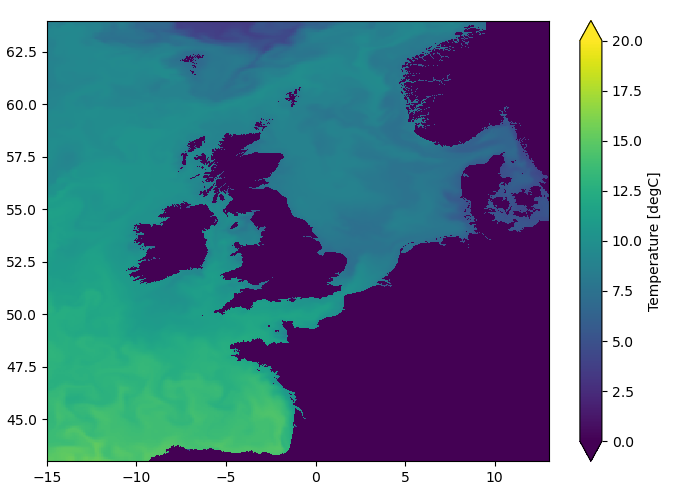

signal from slider
set value of itime to 87

slider receives signal from variable itime. Value is 87



In [7]:
class MyPlot1(wt.wtPlot):
    def __init__(self,map,variables,*args,**kwargs):
        super().__init__(variables,*args,**kwargs)
        #expand here with your own data
        self.map = map
        self.cb=None #remember colorbar; no colorbar yet

    def redraw(self):
        ax=self.ax
        fig=self.fig
        ivartype=self.variables[0].value # variable type is first variable
        itime=self.variables[1].value # current time is second variable
        ilayer=self.variables[2].value # layer number is third variable
        xs = self.map.x_center
        ys = self.map.y_center
        zs = self.map.z_center_3d
        self.pc=None
        if ivartype==0:
            temp = map.temperature.isel(time=itime,z=ilayer) #select part of the data
            pc = ax.pcolormesh(xs,ys,temp,vmin=0,vmax=20)
            if self.cb is None:
                self.cb=fig.colorbar(pc,ax=ax,extend="both")
            self.cb.update_normal(pc) #adjust colorbar to new data
            self.cb.set_label("Temperature [degC]")
        else:
            sal = map.salinity.isel(time=itime,z=ilayer) #select part of the data
            pc = ax.pcolormesh(xs,ys,sal,vmin=20,vmax=35)
            if self.cb is None:
                self.cb=fig.colorbar(pc,ax=ax,extend="both")
            self.cb.update_normal(pc)
            self.cb.set_label("Salinity [psu]")
        self.pc=pc

# Variables and buttons
ivartype=wt.ListVariable("vartype","Quantity",["Temperature","Salinity"])
ivartype_lst=wt.WtListDropdown(ivartype)
itime=wt.IntVariable("itime","time-step",0,len(map.time),0) #define variable
itime_sld=wt.WtIntSlider(itime) # add a control widget
ilayer=wt.IntVariable("ilayer","layer",0,len(map.z),len(map.z)-1)
ilayer_sld=wt.WtIntSlider(ilayer)

# Plots
p1=MyPlot1(map,[ivartype,itime,ilayer]) #create plot linked to variables

# Layout and start
bottom_widgets=widgets.HBox([ivartype_lst,itime_sld,ilayer_sld])
top_widgets= p1
gui=widgets.VBox([bottom_widgets,top_widgets]) #stack the parts
display(gui)
p1.redraw() #draw the initial plot